In [1]:
#Import Depencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
#Load Datasets
#popn_df = pd.read_csv("Resource/County_Popn.csv")
ownership_rate = pd.read_csv("Resource/OwnerRateTop5.csv")
popn = pd.read_csv("Resource/PopTop5.csv")
median_income = pd.read_csv("Resource/mhinc.csv")
#permits_df = pd.read_csv("Resource/Building_Permits.csv")
#income_df = pd.read_csv("Resource/Median_Income.csv")

In [3]:
# Display ownership rate data
ownership_rate

,Year,State,County,CountyID,Ownership Rate (%)
0,2009,ID,Ada,AdaID2009,73.167951
1,2010,ID,Ada,AdaID2010,72.448222
2,2011,ID,Ada,AdaID2011,71.267323
3,2012,ID,Ada,AdaID2012,69.819289
4,2013,ID,Ada,AdaID2013,69.484129
...,...,...,...,...,...
2707,2015,AZ,Yuma,YumaAZ2015,67.905447
2708,2016,AZ,Yuma,YumaAZ2016,67.824290
2709,2017,AZ,Yuma,YumaAZ2017,67.638026
2710,2018,AZ,Yuma,YumaAZ2018,67.216111


In [4]:
popn

,State,Year,County,CountyID,Popn Change,Pop Change (%),Population
0,AL,2010,Baldwin,BaldwinAL2010,40969,22.477711,183112
1,AL,2011,Baldwin,BaldwinAL2011,40969,22.477711,186558
2,AL,2012,Baldwin,BaldwinAL2012,40969,22.477711,190145
3,AL,2013,Baldwin,BaldwinAL2013,40969,22.477711,194885
4,AL,2014,Baldwin,BaldwinAL2014,40969,22.477711,199183
...,...,...,...,...,...,...,...
2495,WY,2015,Albany,AlbanyWY2015,2581,7.110389,37960
2496,WY,2016,Albany,AlbanyWY2016,2581,7.110389,37923
2497,WY,2017,Albany,AlbanyWY2017,2581,7.110389,38459
2498,WY,2018,Albany,AlbanyWY2018,2581,7.110389,38728


In [5]:
median_income

,Year,State,County,CountyID,Income
0,2009,AL,Baldwin,BaldwinAL2009,48637
1,2010,AL,Baldwin,BaldwinAL2010,47618
2,2011,AL,Baldwin,BaldwinAL2011,50144
3,2012,AL,Baldwin,BaldwinAL2012,48867
4,2013,AL,Baldwin,BaldwinAL2013,47539
...,...,...,...,...,...
2706,2015,AZ,Yuma,YumaAZ2015,40426
2707,2016,AZ,Yuma,YumaAZ2016,42998
2708,2017,AZ,Yuma,YumaAZ2017,46013
2709,2018,AZ,Yuma,YumaAZ2018,44116


In [6]:
# merge population and home ownership dataframes
#drop common columns before merge
popn = popn.drop(columns=["State", "County", "Year"])

# Merge dataframes on CountyID
pop_ownership = pd.merge(ownership_rate, popn, on="CountyID", how='inner')
pop_ownership

,Year,State,County,CountyID,Ownership Rate (%),Popn Change,Pop Change (%),Population
0,2010,ID,Ada,AdaID2010,72.448222,89215,22.737351,393354
1,2011,ID,Ada,AdaID2011,71.267323,89215,22.737351,401262
2,2012,ID,Ada,AdaID2012,69.819289,89215,22.737351,408862
3,2013,ID,Ada,AdaID2013,69.484129,89215,22.737351,415951
4,2014,ID,Ada,AdaID2014,68.500504,89215,22.737351,425471
...,...,...,...,...,...,...,...,...
2360,2015,AZ,Yuma,YumaAZ2015,67.905447,18037,9.214304,205186
2361,2016,AZ,Yuma,YumaAZ2016,67.824290,18037,9.214304,207247
2362,2017,AZ,Yuma,YumaAZ2017,67.638026,18037,9.214304,209507
2363,2018,AZ,Yuma,YumaAZ2018,67.216111,18037,9.214304,211612


In [7]:
# Merge the resulting dataframe with the median income dataframe
# First drop common columns to avoid subscriting
median_income = median_income.drop(columns=["State", "County", "Year"])

# Then merge median income to the above merged dataframe, call the final dataframe "df"
df = pd.merge(median_income, pop_ownership, on="CountyID", how="inner")
df

,CountyID,Income,Year,State,County,Ownership Rate (%),Popn Change,Pop Change (%),Population
0,BaldwinAL2010,47618,2010,AL,Baldwin,76.889446,40969,22.477711,183112
1,BaldwinAL2011,50144,2011,AL,Baldwin,76.287403,40969,22.477711,186558
2,BaldwinAL2012,48867,2012,AL,Baldwin,73.192278,40969,22.477711,190145
3,BaldwinAL2013,47539,2013,AL,Baldwin,72.061380,40969,22.477711,194885
4,BaldwinAL2014,49626,2014,AL,Baldwin,71.204280,40969,22.477711,199183
...,...,...,...,...,...,...,...,...,...
2295,YumaAZ2015,40426,2015,AZ,Yuma,67.905447,18037,9.214304,205186
2296,YumaAZ2016,42998,2016,AZ,Yuma,67.824290,18037,9.214304,207247
2297,YumaAZ2017,46013,2017,AZ,Yuma,67.638026,18037,9.214304,209507
2298,YumaAZ2018,44116,2018,AZ,Yuma,67.216111,18037,9.214304,211612


In [8]:
# Averaging the values by county
df2 = df[["Ownership Rate (%)", "Popn Change", "Pop Change (%)", "Population", "Income", "County"]].groupby(["County"]).mean()
df2

,Ownership Rate (%),Popn Change,Pop Change (%),Population,Income
County,,,,,
Ada,70.162929,89215.0,22.737351,432914.70,58786.80
Addison,76.627274,-41.0,-0.111359,36896.70,59545.90
Alameda,56.284380,161071.0,10.665131,1606881.90,82938.20
Albany,54.197032,2581.0,7.110389,37780.50,44694.20
Ascension,81.276240,19389.0,18.084223,117767.20,71029.50
...,...,...,...,...,...
Windham,72.738073,-1598.0,-1.349890,117185.30,59246.00
Wright,86.230406,13680.0,10.970593,130876.00,76802.40
Yolo,52.840932,19645.0,9.780688,210905.20,59123.30


In [9]:
df2.count()

Ownership Rate (%)    195
Popn Change           195
Pop Change (%)        195
Population            195
Income                195
dtype: int64

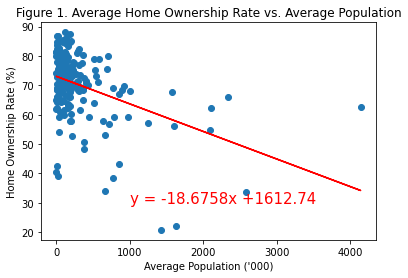

In [10]:
# Analyses of home ownership rate vs. average population ('000)

# Firsst convert population to population in thousands
df2["Population ('000)"] = (df2["Population"] / 1000)
df2

# Define the axes
x = df2.iloc[:,5].values.reshape(-1,1) # population
y = df2.iloc[:,0].values.reshape(-1,1) # home ownership rate

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
owner = df2.iloc[:,0] # home ownership rate
pop = df2.iloc[:,5] # Population

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(owner, pop)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))


# Plot and label the scatter plot and fit the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (1000,30), fontsize=15, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Population ('000)")
plt.title("Figure 1. Average Home Ownership Rate vs. Average Population")
plt.savefig("Images/fig1.png")

In [11]:
df2

,Ownership Rate (%),Popn Change,Pop Change (%),Population,Income,Population ('000)
County,,,,,,
Ada,70.162929,89215.0,22.737351,432914.70,58786.80,432.91470
Addison,76.627274,-41.0,-0.111359,36896.70,59545.90,36.89670
Alameda,56.284380,161071.0,10.665131,1606881.90,82938.20,1606.88190
Albany,54.197032,2581.0,7.110389,37780.50,44694.20,37.78050
Ascension,81.276240,19389.0,18.084223,117767.20,71029.50,117.76720
...,...,...,...,...,...,...
Windham,72.738073,-1598.0,-1.349890,117185.30,59246.00,117.18530
Wright,86.230406,13680.0,10.970593,130876.00,76802.40,130.87600
Yolo,52.840932,19645.0,9.780688,210905.20,59123.30,210.90520


### Discussion of Results
The data consists of 196 of the fastest growing counties selected among the top population growth counties in each state. The variables are defined as follows:
* The ***Ownership rate (%)*** is the percentage of home occupied by the homeowners in each county
* ***Pop Change*** is the absolute change in the population in the ten-year period between 2009 and 2019
* ***Pop Change (%)*** is the percentage change in the population in the ten-year period between 2009 and 2019
* ***Income*** is the meadian household income for each county
* ***Population*** is the annual population for each county

We also looked at the links between:
1. Changes in population (both absolute and as a percentage) and the homeownership rate
2. Changes in income and home ownership rate

#### Figure 1. Link between Population and Homeownership Rates
According to the scatter plot in Figure 1, the scatter plot shows a slight negative effect of rising population on the home ownership rate. This is further confirmed by the clearly negatively sloped regression line. However, this results needs to be taken with caaution because as the scatter plot shows, a significant number of counties with population below 1,000,000 have high homeownership rates ranging from 60% to 90% regardless of population. Further analysis is needed to determine whether this relationship is significant.

C:\Users\yu_ka\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


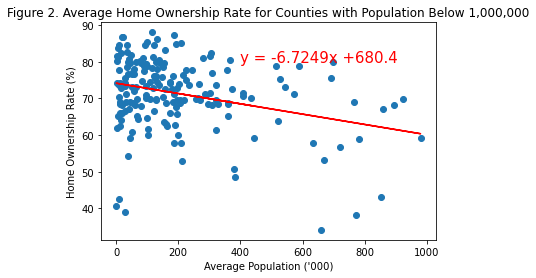

In [12]:
# Analysis of home ownership rate vs. average population below 1,000,000

# Restrict the sample to counties with Population below 1000000
df3 = df2[df2["Population"]<1000000]

# Convert population to population in thousands
df3["Population ('000)"] = (df2["Population"] / 1000)


# Define the axes
x = df3.iloc[:,5].values.reshape(-1,1) # population
y = df3.iloc[:,0].values.reshape(-1,1) # home ownership rate

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
owner = df3.iloc[:,0] # home ownership rate
pop = df3.iloc[:,5] # population

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(owner, pop)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))


# Plot and label the scatter plot and fit the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (400,80), fontsize=15, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Population ('000)")
plt.title("Figure 2. Average Home Ownership Rate for Counties with Population Below 1,000,000")
plt.savefig("Images/fig2.png")

#### Figure 2: Home Ownership Rates for Counties with Population Below 1,000,000
The negative relationship persists but the strength of the relationship is weakened significantly. In fact further analysis showed that as we limit the sample to counties with lesser population sizes, the negative relationship vanishes. This seems to support the premise that increases in population reduces the homeownershi rate.

Next, I will examine the impact of median household income on this relationship

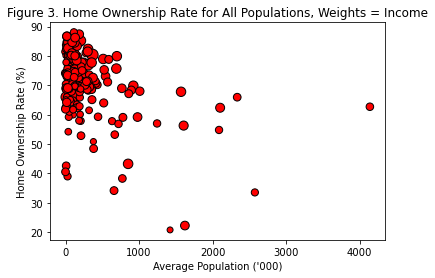

In [13]:
# Analysing the impact of median household income on the above relationship

#First divide income by 1000 to reduce the weights
df2["Income ('000)"] = (df2["Income"] / 1000)


# Define the axes
x = df2.iloc[:,5] # Population
y = df2.iloc[:,0] # home ownership rate
z = df2.iloc[:,6] # Income


plt.scatter(x, y, s=z, color="g", marker="o", facecolors="red", edgecolors="black")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Population ('000)")
plt.title("Figure 3. Home Ownership Rate for All Populations, Weights = Income")
plt.savefig("Images/fig3.png")

* Income does not appear to have any impact on the relationship between home ownership rates and population. We will do the same thid but for counties with a population below 1,000,000.

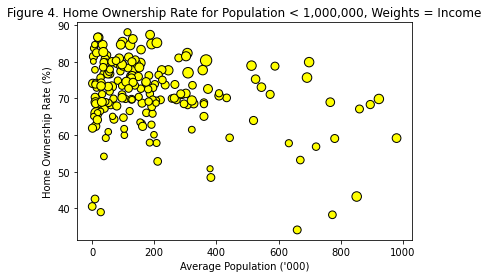

In [14]:
#First divide income by 1000 to reduce the weights
df2["Income ('000)"] = (df2["Income"] / 1000)

# Reduce the sample
df4 = df2[df2["Population"]<1000000]

# Define the axes
x = df4.iloc[:,5] # population
y = df4.iloc[:,0] # home ownership rate
z = df4.iloc[:,6] # household income


plt.scatter(x, y, s=z, color="g", marker="o", facecolors="yellow", edgecolors="black")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Population ('000)")
plt.title("Figure 4. Home Ownership Rate for Population < 1,000,000, Weights = Income")
plt.savefig("Images/fig4.png")

* Same as above, no clear impact as there are both high income counties all over the place when it comes to the home ownership rates. 
Now I examine income and home ownership rates.

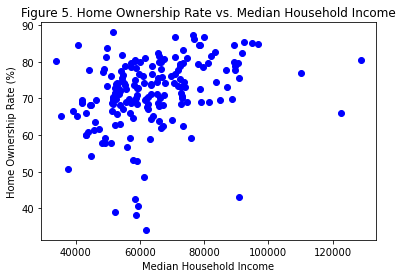

In [15]:
#df2["Income ('000)"] = (df2["Income"] / 1000)

# Define the axes
x = df4.iloc[:,4] # median household income
y = df4.iloc[:,0] # home ownership rate


plt.scatter(x, y, color="b")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Median Household Income")
plt.title("Figure 5. Home Ownership Rate vs. Median Household Income")
plt.savefig("Images/fig5.png")

This is of course expected as Figure 5 appears to show an increas in home ownership rates as median houshold increases. However, we cannot ignore the few exceptions where home ownership rates are significantly high at relatively very low income levels.

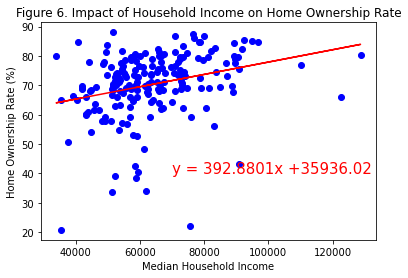

In [16]:
# Fitting a regression line on the above plot.

# Define the axes
y = df2.iloc[:,0].values.reshape(-1,1) # home ownership rate
x = df2.iloc[:,4].values.reshape(-1,1) # median household income

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
owner = df2.iloc[:,0] # home ownership rate
income = df2.iloc[:,4] # median household income

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(owner, income)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))

plt.scatter(x, y, color="b")
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (70000,40), fontsize=15, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Median Household Income")
plt.title("Figure 6. Impact of Household Income on Home Ownership Rate")
plt.savefig("Images/fig6.png")

The fitted regression line further supports the conclusion above: home ownership rates increases with median household income in most counties.

Lastly, below, I will examine this relationship for counties with a population below 1,000,000.

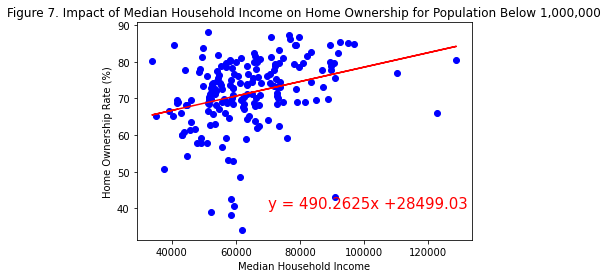

In [17]:
# Effect of household income on homeownership for counties with a population below 1,000,000

df4 = df2[df2["Population"]<1000000]

# Define the axes
y = df4.iloc[:,0].values.reshape(-1,1) # home ownership rate
x = df4.iloc[:,4].values.reshape(-1,1) # median household income

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
owner = df4.iloc[:,0] # home ownership rate
income = df4.iloc[:,4] # median household income

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(owner, income)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))

plt.scatter(x, y, color="b")
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (70000,40), fontsize=15, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Median Household Income")
plt.title("Figure 7. Impact of Median Household Income on Home Ownership for Population Below 1,000,000")
plt.savefig("Images/fig7.png")

* The impact is stronger as shown by the higher slope of the regression line.

In [18]:
# Averaging all counties for each over the ten-year period
df2_yearly = df[["Ownership Rate (%)", "Popn Change", "Pop Change (%)", "Population", "Income", "Year"]].groupby(["Year"]).mean()
df2_yearly

,Ownership Rate (%),Popn Change,Pop Change (%),Population,Income
Year,,,,,
2010,72.470310,33472.321739,16.372683,270380.273913,56026.630435
2011,71.939171,33472.321739,16.372683,273833.643478,56901.373913
2012,71.327829,33472.321739,16.372683,277463.834783,58343.152174
2013,70.618635,33472.321739,16.372683,281126.060870,59884.852174
2014,70.079618,33472.321739,16.372683,285024.239130,61663.091304
2015,69.635717,33472.321739,16.372683,288970.478261,63837.347826
2016,69.617025,33472.321739,16.372683,292913.378261,65969.778261
2017,69.923347,33472.321739,16.372683,296578.169565,68295.786957
2018,70.338459,33472.321739,16.372683,299901.721739,70665.891304


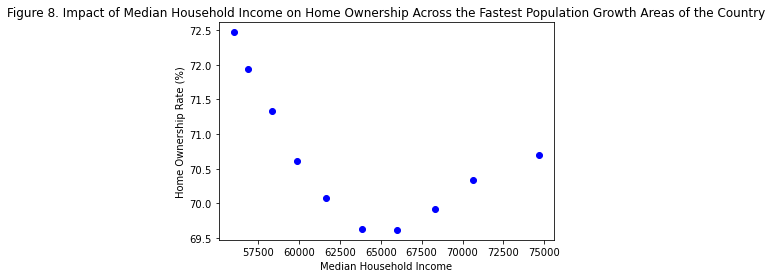

In [19]:
x1 = df2_yearly.iloc[:,3] # population
x2 = df2_yearly.iloc[:,4] # median household income
y = df2_yearly.iloc[:,0] # home ownership rate

# Plotting income and ownership rates over ten years
plt.scatter(x2, y, color="b")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Median Household Income")
plt.title("Figure 8. Impact of Median Household Income on Home Ownership Across the Fastest Population Growth Areas of the Country")
plt.savefig("Images/fig8.png")

### Figure 8. Home Ownership Rate Post 2008/09 Recession
* This is an interesting graph, we see a sharp decline in ownership rates as median household income rose between 2010 - 2016, the as income continue to rise, home ownership rates started rising, but at a much slower pace compared to the rate of decline.

* There could be several factors responsible for the decline. One possible reason could be the lingering impact of the 2008/2009 recession as many home owners were forclosed on. As the economy started to recover, people started to buy home again, but this time there were stronger credit restrictions, which could probably explain the slow pace of the increase in home ownership.

In [ ]:
# Plotting population and ownership rates over ten years
plt.scatter(x1, y, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Population")
plt.title("Figure 9. Impact of Population Growth on Home Ownership Across the Fastest Population Growth Areas of the Country")
plt.savefig("Images/fig9.png")

This graph is eerily similar to Figure 8. The only slight difference is that the drop in home ownership rates is not as steep. We will get a similar graph if we replace income and population with time in the horizontal axis. This implies that there is a another factor driving the home ownership numbers. One can argue as I discussed above that rthis factor is the great recession.

#### Figure 2: Population Growth and Home Ownership Rates
Figure 2 does not appear to provide any clear evidence that higher population growth has an effect on the home ownership rate.